## Probability that Sample Mean is within certain distance of true mean, as a Function of $n$
### Pretend we have a large collection of objects with some numerical property which we have reason to assume is normally distributed with mean $\mu$ and standard deviation $\sigma$.  That is, $X \sim N(\mu,\sigma)$ for the random variable $X$.  
### We draw a random sample of size $n$ from this collection.  For a given $n$, what's the probability that our *sample* mean $\bar{X}$ is within distance $d$ of the mean $\mu$ of the full collection of objects?  Of course we would prefer to draw a very large sample, but reality limits how big a sample we can draw.  For the sample size $n$ that we are able to collect, how probable is it that our sample mean is close to the true mean?  We need to compute:  
$$P( (\mu - d) < X < (\mu + d) )$$ 
### as a function of $n$.  Change variables from $X$ to $Z$ so that we can use the standard normal distribution for computing the areas:  $Z \equiv \frac{X-\mu_{\bar{X}}}{\sigma_{\bar{X}}}$.  (Yes, pnorm( ) has the option to supply mean and sd other than the defaults of mean = 0, sd = 1, but I think it is cleaner and easier to think in terms of standard normal).  From Theorem A, we can assert $\mu_{\bar{X}} = \mu$ and $\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$.  So:
$$
\begin{eqnarray}
P( (\mu - d) < X < (\mu + d) ) & = & P \left( \frac{(\mu -d) - \mu_{\bar{X}}}{\sigma/\sqrt{n}} < \frac{X-\mu_{\bar{X}}}{\sigma_{\bar{X}}} < \frac{(\mu +d) - \mu_{\bar{X}}}{\sigma/\sqrt{n}} \right) \\
                 & = & P\left( \frac{-d\sqrt{n}}{\sigma} < Z < \frac{d\sqrt{n}}{\sigma} \right) \\
                 & = & P\left( Z < \frac{d\sqrt{n}}{\sigma} \right) - P\left( Z < \frac{-d\sqrt{n}}{\sigma} \right) \\
                 & = & \mbox{pnorm}( (d\sqrt{n}) / \sigma ) - \mbox{pnorm}( (-d\sqrt{n}) / \sigma )
\end{eqnarray}
$$
### So it's no surprise that if we want our sample mean to be very likely to be close to the true mean (i.e., small $d$), then we need to increase $n$.  Alternately, if we cannot increase $n$ then for whatever sample size $n$ we were able to gather, we have to accept a limit on how confident we can be that our sample mean is close to the true mean.

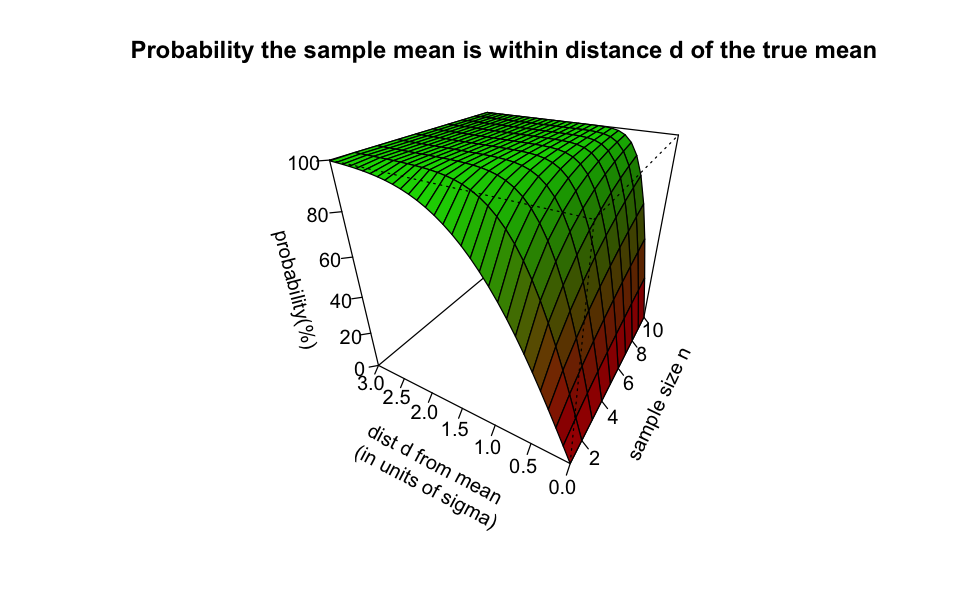

In [3]:
n <- 1:10
d <- seq(0,3,0.1)   # in units of sigma
f <- function(n,d){ 100.*( pnorm(d*sqrt(n)) - pnorm(-d*sqrt(n)) ) }
z <- outer(n,d,f)

#########################################################################
# color shading function from:
#    http://svitsrv25.epfl.ch/R-doc/library/graphics/html/persp.html
nrz <- nrow(z) ; ncz <- ncol(z)
# Create a function interpolating colors in the range of specified colors
jet.colors <- colorRampPalette( c("red", "green") ) 
# Generate the desired number of colors from this palette
nbcol <- 100
color <- jet.colors(nbcol)
# Compute the z-value at the facet centres
zfacet <- z[-1, -1] + z[-1, -ncz] + z[-nrz, -1] + z[-nrz, -ncz]
# Recode facet z-values into color indices
facetcol <- cut(zfacet, nbcol)
#########################################################################

options(repr.plot.width=8, repr.plot.height=5)

persp(n,d,z,theta=-60,phi=30,shade=0.25,axes=T,ticktype="detailed", col=color[facetcol],
         main="Probability the sample mean is within distance d of the true mean",
         xlab="\n\nsample size n",ylab="\n\n\ndist d from mean \n(in units of sigma)", zlab="\n\nprobability(%)")

### This conveys the sensible result that for a given $d$ (e.g., "What's the likelihood our sample mean $\bar{X}$ is within 1-$\sigma$ of the true mean?"), you would need to increase the sample size to increase the likelihood.  Or, for a given sample size (e.g., $n$ = 8), you have higher confidence that you are within 1-$\sigma$ of the true mean.